In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


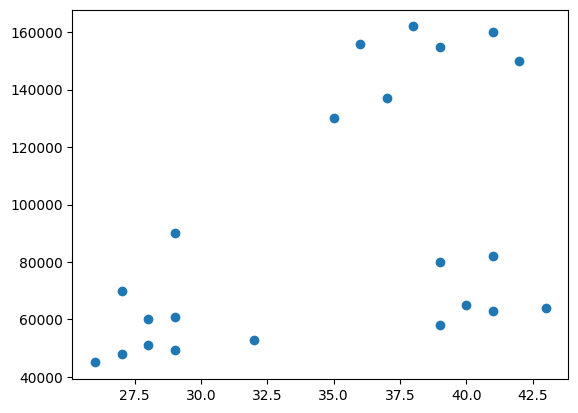

In [14]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init='auto')
km.fit(df[["Age", "Income($)"]])
km.labels_

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [16]:
df['cluster'] = km.labels_
df.sample(15)

,Name,Age,Income($),Cluster,cluster
6,David,41,160000,0,1
0,Rob,27,70000,1,0
18,Nick,43,64000,1,2
13,Jared,28,51000,1,2
21,Abdul,39,58000,1,2
17,Priyanka,41,63000,1,2
15,Ranbir,32,53000,1,2
9,Angelina,35,130000,2,1
10,Donald,37,137000,2,1
14,Stark,29,49500,1,2


<Axes: xlabel='Age', ylabel='Income($)'>

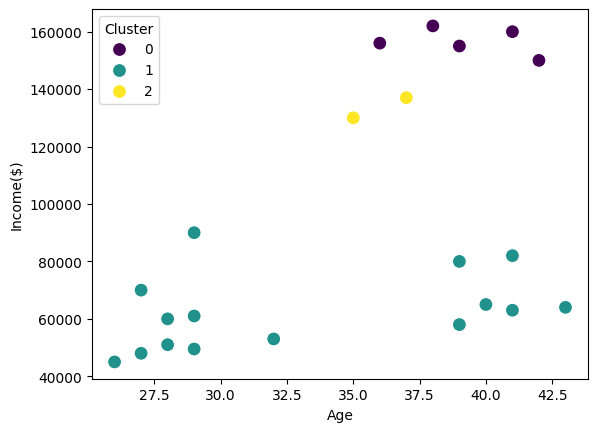

In [18]:
import seaborn as sns

sns.scatterplot(df, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [28]:
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled[["Age", "Income($)"]])
df_scaled['Cluster'] = km.labels_
df_scaled.head()

centroids = km.cluster_centers_


<Axes: xlabel='Age', ylabel='Income($)'>

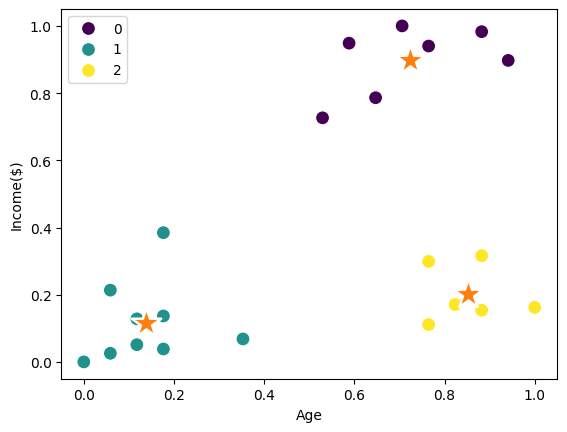

In [36]:
import seaborn as sns

sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")
sns.scatterplot( x=centroids[:,0], y=centroids[:,1], marker='*',s=500)

In [38]:
km.inertia_

0.12295068620668241

In [41]:
sse=[];

for k in range(1,10):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.29745481011155467,
 0.2601644915141204,
 0.18883868819988073,
 0.15428228813021652,
 0.10824862283029266]

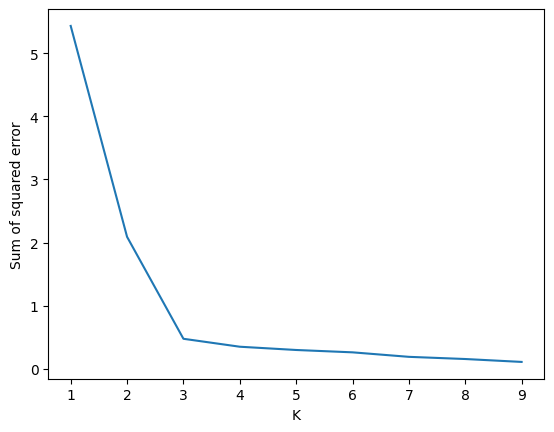

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)
plt.show()